In [24]:
import pandas

df = pandas.read_csv("max.csv")

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,1.723811,1.727205,1.718390,1.718597,1.718597,0.0
1,2003-12-02,1.719010,1.732112,1.717298,1.730313,1.730313,0.0
2,2003-12-03,1.730493,1.731812,1.725209,1.728101,1.728101,0.0
3,2003-12-04,1.727414,1.728997,1.718302,1.720697,1.720697,0.0
4,2003-12-05,1.720608,1.733102,1.719809,1.733102,1.733102,0.0


In [25]:
import datetime

df = df[["Date", "Close"]]

# df["Date"] = df["Date"].map(lambda x: datetime.datetime.strptime(x, "%Y-%M-%d").date())

df.head()

,Date,Close
0,2003-12-01,1.718597
1,2003-12-02,1.730313
2,2003-12-03,1.728101
3,2003-12-04,1.720697
4,2003-12-05,1.733102


In [26]:
df.columns = ["ds", "y"]

df.tail()

,ds,y
4742,2022-02-02,1.352539
4743,2022-02-03,1.356502
4744,2022-02-04,1.359841
4745,2022-02-07,1.353345
4746,2022-02-08,1.353781


In [31]:
from prophet import Prophet
m = Prophet()

m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\pydlv\anaconda3\envs\fx\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\pydlv\anaconda3\envs\fx\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\pydlv\anaconda3\envs\fx\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_lower,yhat_upper
5003,2023-02-02,1.374069,1.151614,1.612818
5004,2023-02-03,1.374515,1.154820,1.611500
5005,2023-02-06,1.374905,1.152439,1.634396
5006,2023-02-07,1.375726,1.145007,1.613676
5007,2023-02-08,1.376099,1.151511,1.621638


In [38]:
future = m.make_future_dataframe(periods=365)
future = future[future["ds"].dt.dayofweek < 5]

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

C:\Users\pydlv\anaconda3\envs\fx\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\pydlv\anaconda3\envs\fx\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_lower,yhat_upper
5003,2023-02-02,1.374069,1.156863,1.615481
5004,2023-02-03,1.374515,1.160926,1.610530
5005,2023-02-06,1.374905,1.158958,1.616441
5006,2023-02-07,1.375726,1.147727,1.624548
5007,2023-02-08,1.376099,1.140821,1.609483


C:\Users\pydlv\anaconda3\envs\fx\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\pydlv\anaconda3\envs\fx\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



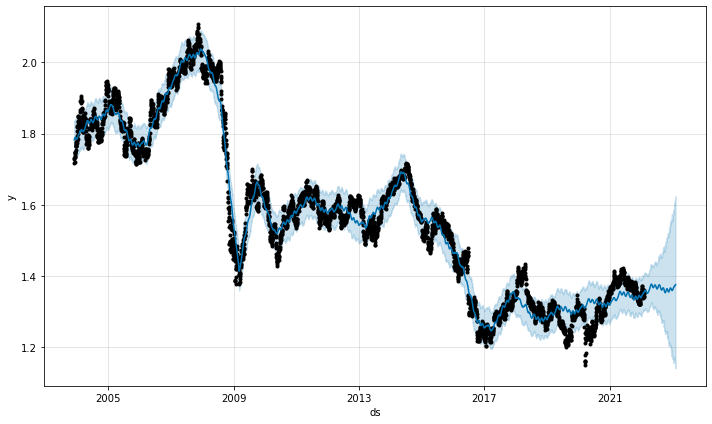

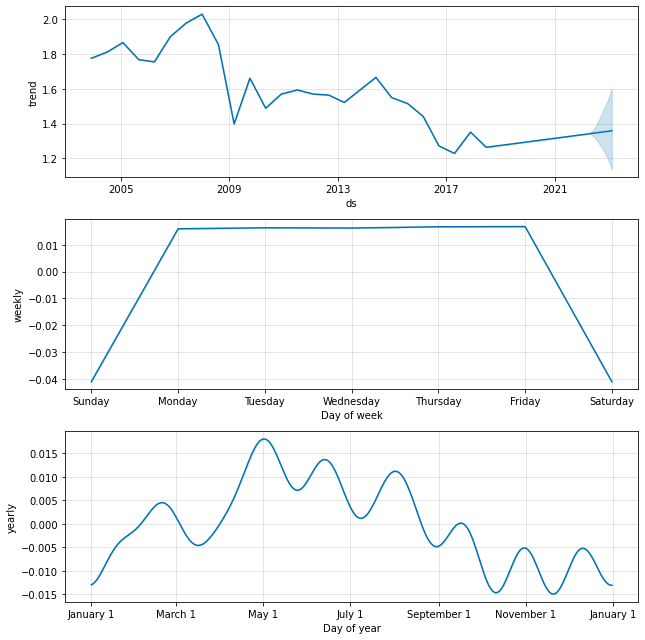

In [39]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [33]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [30]:
# Python
plot_components_plotly(m, forecast)

C:\Users\pydlv\anaconda3\envs\fx\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\pydlv\anaconda3\envs\fx\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [34]:
import json
from prophet.serialize import model_to_json

with open('model.json', 'w') as fout:
    json.dump(model_to_json(m), fout)  # Save model

In [55]:
for k, row in forecast.iterrows():
    if row["ds"].date() > datetime.datetime.now().date():
        print(row)
        break

ds                            2022-02-09 00:00:00
trend                                    1.338253
yhat_lower                                1.30459
yhat_upper                               1.407326
trend_lower                              1.338253
trend_upper                              1.338253
additive_terms                           0.017934
additive_terms_lower                     0.017934
additive_terms_upper                     0.017934
weekly                                   0.016257
weekly_lower                             0.016257
weekly_upper                             0.016257
yearly                                   0.001677
yearly_lower                             0.001677
yearly_upper                             0.001677
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                     1.356187
Name: 4747, dtype: object
